
Task 1: EBC Cypher

In [7]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

key = get_random_bytes(AES.block_size)

def encryption(filename: str, key: int):
    with open(filename, 'rb') as f:
        content = f.read()
    
    plaintext = content[54:]
    headers = content[:54]

    ciphertext = ecb_encryption(plaintext=plaintext, key=key)
    ciphertext = b''.join(ciphertext)
    data = headers + ciphertext

    with open(f"{filename}_enc.bmp", "wb") as f:
        f.write(data)
    return True

def ecb_encryption(plaintext, key):
    cipher = AES.new(key=key, mode=AES.MODE_ECB)
    padded_text = pkcs7(plaintext)
    blocks = [padded_text[idx:idx+AES.block_size] for idx in range(0, len(padded_text), 16)]

    ciphered_text = [
        cipher.encrypt(bytes([block[i] ^ key[i] for i in range(AES.block_size)]))
        for block in blocks]
    return ciphered_text

def pkcs7(unpadded):
    padding = AES.block_size- len(unpadded) % AES.block_size
    return unpadded + bytes([padding] * padding)


if __name__ == '__main__':
    print('Everything worked' if encryption('images/mustang.bmp', key) else 'Didnt work :(')


Everything worked


Task 1: CBC Cypher

In [8]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

key = get_random_bytes(16)  
iv = get_random_bytes(16)  


def encrypt_cbc(plaintext, key, iv):
    cipher = AES.new(key, AES.MODE_CBC, iv)
    padded_text = pkcs7(plaintext)
    
    return cipher.encrypt(padded_text)

def encryption(filename: str, key: int):
    with open(filename, 'rb') as f:
        content = f.read()
    print(key, AES.block_size)
    
    plaintext = content[54:]
    headers = content[:54]
    print(type(plaintext[0]))
    print(f'{headers[0]}\n\n\n\n\n{plaintext[0]}')

    ciphertext = encrypt_cbc(plaintext=plaintext, key=key, iv=iv)
    ciphertext = bytes(ciphertext)
    data = headers + ciphertext

    with open(f"{filename}_cbc.bmp", "wb") as f:
        f.write(data)
    return True

def pkcs7(unpadded):
    padding = AES.block_size- len(unpadded)% AES.block_size
    return unpadded + bytes([padding] * padding)

if __name__ == '__main__':
    encryption('images/mustang.bmp', key)


b'\xa1\x8d\x04\xf1\xaf\xaf\xe0\x7f-y\x05\xbch\xe8/?' 16
<class 'int'>
66




255


Task 2: Bit flipping 

In [10]:
from cbc import encrypt_cbc
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad

key = get_random_bytes(AES.block_size)
iv = get_random_bytes(16)  

def submit(userdata: str):
    url_list = []
    for c in userdata:
        if c ==';':
            url_list.append('%3B')
        elif c == '=':
            url_list.append('%3D')
        else:
            url_list.append(c)
    url_encoded = ''.join(url_list)
    raw_text = "userid=456;userdata=" + url_encoded + ";session-id=31337"
    byte_text = raw_text.encode()
    print('Original message:', byte_text)
    print('Original length:', len(byte_text))
    encryption = encrypt_cbc(byte_text, key, iv)
    print('Encrypted message:', encryption)
    print('Encrypted length:', len(encryption))
    return encryption

def verify(data):
    
    cipher = AES.new(key, mode=AES.MODE_CBC, iv=iv)
    print('Recieved cipher:  ', data)
    decryption_text = cipher.decrypt(data)
    decryption_text = unpad(decryption_text, AES.block_size)
    print('Decrypted text:', decryption_text)
    if b'admin=true' in  decryption_text:
        return True
    else:
        return False

def flip_bit(ciphertext, position, bit_mask):
    ciphertext_mutable = bytearray(ciphertext)
    ciphertext_mutable[position] ^= bit_mask
    return bytes(ciphertext_mutable)


if __name__ == '__main__':
    xor = ord('/') ^ ord('=')
    s_str = 'admin/true'
    encryption = submit(s_str)
    encryption = bytearray(encryption)
    slash_i = 25
    block_num =  slash_i // 16
    block_i = slash_i % 16
    position = (block_num-1)*16 + block_i
    encryption[position] ^= xor

    print(verify(bytes(encryption)))


Original message: b'userid=456;userdata=admin/true;session-id=31337'
Original length: 47
Encrypted message: b'W\xb4\xd7\x8e9OE7\x18\x98Q\xf3\xb0\x05\xe49\xea#\xbd\xd9\x9d\xf6s\xa5vu\xda\xba\x87u\xb8\xccO\x8c\x94\x96\x10r\xa0\x12\x96\x15\xb7\xef\xcc\xbc\xd3\xfe'
Encrypted length: 48
Recieved cipher:   b'W\xb4\xd7\x8e9OE7\x18\x8aQ\xf3\xb0\x05\xe49\xea#\xbd\xd9\x9d\xf6s\xa5vu\xda\xba\x87u\xb8\xccO\x8c\x94\x96\x10r\xa0\x12\x96\x15\xb7\xef\xcc\xbc\xd3\xfe'
Decrypted text: b'\xa8\x90.\xc0@pA\x0f\xd6@\xc4\t\xd6y\x96*ata=admin=true;session-id=31337'
True


Task 3: Performance Comparision

Matplotlib is building the font cache; this may take a moment.


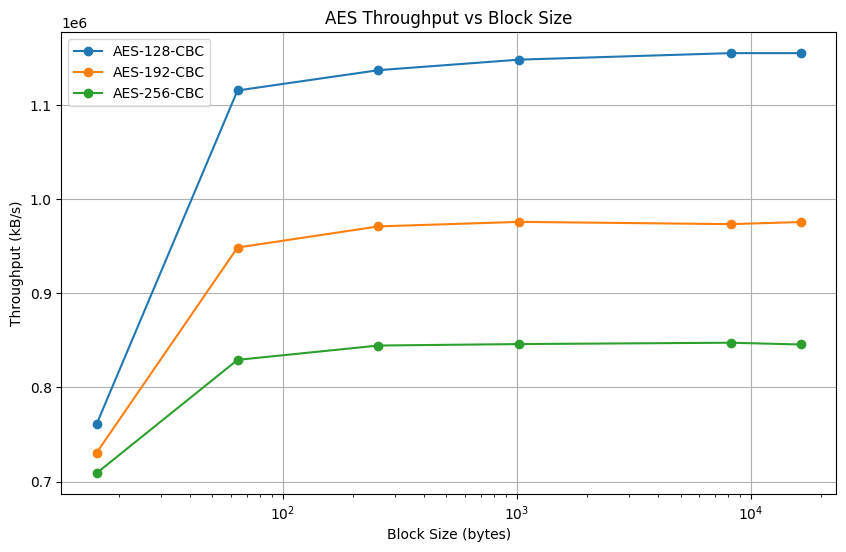

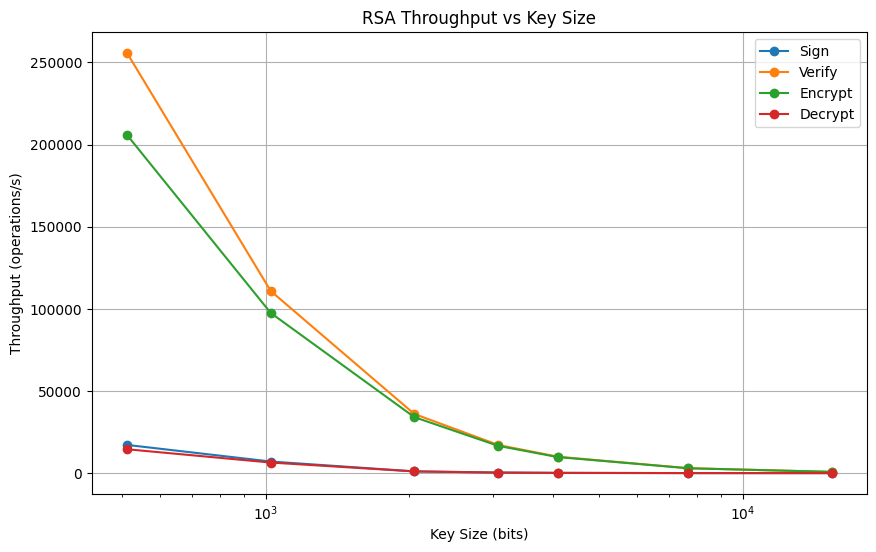

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# AES Data
block_sizes = [16, 64, 256, 1024, 8192, 16384]
aes_128_throughput = [761088.65, 1115339.76, 1136896.97, 1148086.98, 1155006.02, 1154973.04]
aes_192_throughput = [730587.24, 948531.22, 970977.42, 975781.63, 973379.57, 975609.28]
aes_256_throughput = [708931.47, 829221.61, 844436.17, 845991.81, 847429.41, 845542.57]

# Plot AES Graph
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, aes_128_throughput, marker='o', label='AES-128-CBC')
plt.plot(block_sizes, aes_192_throughput, marker='o', label='AES-192-CBC')
plt.plot(block_sizes, aes_256_throughput, marker='o', label='AES-256-CBC')
plt.xscale('log')
plt.xlabel('Block Size (bytes)')
plt.ylabel('Throughput (kB/s)')
plt.title('AES Throughput vs Block Size')
plt.legend()
plt.grid(True)
plt.show()

# RSA Data
key_sizes = [512, 1024, 2048, 3072, 4096, 7680, 15360]
rsa_sign = [17161.1, 7058.5, 1069.9, 353.1, 159.0, 17.2, 3.4]
rsa_verify = [255634.8, 110856.3, 36008.1, 17143.2, 10007.7, 2996.4, 766.7]
rsa_encrypt = [205749.5, 97496.2, 34092.0, 16584.6, 9760.5, 2973.0, 756.2]
rsa_decrypt = [14522.6, 6441.6, 1042.4, 326.8, 158.0, 17.2, 3.4]

# Plot RSA Graph
plt.figure(figsize=(10, 6))
plt.plot(key_sizes, rsa_sign, marker='o', label='Sign')
plt.plot(key_sizes, rsa_verify, marker='o', label='Verify')
plt.plot(key_sizes, rsa_encrypt, marker='o', label='Encrypt')
plt.plot(key_sizes, rsa_decrypt, marker='o', label='Decrypt')
plt.xscale('log')
plt.xlabel('Key Size (bits)')
plt.ylabel('Throughput (operations/s)')
plt.title('RSA Throughput vs Key Size')
plt.legend()
plt.grid(True)
plt.show()


Question: 
1. The EBC encryption yielded a picture with altered colors but the general shape remains intact. This provides a lot of information about the actual picture since it's still clear it's the Cal Poly Mustang. The CBC encryption yields a compeletely random image of which no information can be drawn from. This is due to the cyclic nature of CBC and the chaining of encrypted blocks. EBC on the other hand does not chain and instead uses the constant encryption for each block. 
2. This attack is possible since there is no verification of integrity. This scheme would need to add a integrity check of some form, one could be a hashing sequence to make sure that the hash of the original message matches the recieved message. 
3. For AES, as keysize increases, the throughoutput decreases as block sizes increases. The model shows AES 128 has a significantly higher throughput as block size gets larger with AES 192 as next best and AES 256 as the lowest throughput. 